In [13]:
import pandas as pd
import seaborn as sns

In [14]:
df= pd.read_csv("Titanic.csv")

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lm=LogisticRegression()

<AxesSubplot:>

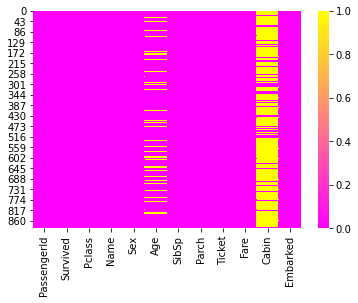

In [17]:
sns.heatmap(df.isnull(),cmap='spring')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [34]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived','Cabin','Embarked'],axis=1)
Y = df['Survived']

In [35]:
df.dropna(inplace=True)

<AxesSubplot:>

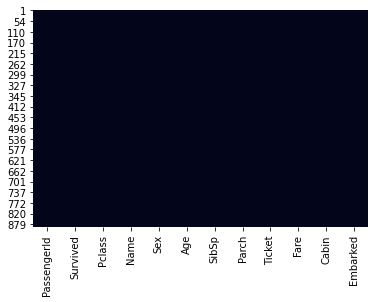

In [36]:
sns.heatmap(df.isnull(),cbar=False)

In [37]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=4)

In [40]:
lm.fit(X_train,y_train)

LogisticRegression()

In [49]:
pridiction=lm.predict(X_test)


In [50]:
from sklearn.metrics import classification_report

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
from sklearn.metrics import accuracy_score

In [55]:
print(classification_report(y_test,pridiction))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.86      0.76      0.81        25

    accuracy                           0.76        37
   macro avg       0.73      0.76      0.74        37
weighted avg       0.78      0.76      0.76        37



In [59]:
confusion_matrix(y_test,pridiction)

array([[ 9,  3],
       [ 6, 19]], dtype=int64)

In [64]:
accuracy_score(y_test,pridiction)

0.7567567567567568